In [41]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataroot = os.environ['HOME']+'/data/cmip6/e3sm/processed'
casename = '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl'
datafile = dataroot+'/'+casename+'/mpaso.hist.am.avgLayer.timeSeriesStatsMonthly.2015-2100.nc'


In [23]:
varprefix = 'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayer'
var = 'Temperature'
varsuffix = ['HorAdv', 'VertAdv', 'VertMix', 'SfcFlux', 'SW', 'NL']

In [5]:
# load data
data = xr.open_dataset(datafile).load()

In [39]:
# get depth
lthickness = data.variables[varprefix+'Thickness']
# print(lthickness)
depth = lthickness.cumsum(dim='nVertLevels')-0.5*lthickness
depth.attrs['long_name'] = 'Average depth within region layer'
print(depth)

<xarray.Variable (Time: 1032, nOceanRegionsTmp: 7, nVertLevels: 60)>
array([[[4.94776728e+00, 1.48433183e+01, 2.47388862e+01, ...,
         4.27608426e+03, 4.40099911e+03, 4.40099911e+03],
        [5.00074687e+00, 1.50022411e+01, 2.50037356e+01, ...,
         4.74194395e+03, 4.95280650e+03, 5.15204282e+03],
        [4.99515741e+00, 1.49854572e+01, 2.49757420e+01, ...,
         4.70446972e+03, 4.89542692e+03, 5.05016272e+03],
        ...,
        [5.00004153e+00, 1.50001377e+01, 2.50002469e+01, ...,
         4.80758824e+03, 5.03152377e+03, 5.22778690e+03],
        [4.99980512e+00, 1.49994294e+01, 2.49990676e+01, ...,
         4.74942133e+03, 4.95580139e+03, 5.13228728e+03],
        [4.99576866e+00, 1.49873073e+01, 2.49788472e+01, ...,
         4.74689514e+03, 4.96100743e+03, 5.16243665e+03]],

       [[4.94203713e+00, 1.48261268e+01, 2.47102321e+01, ...,
         4.27581992e+03, 4.40073024e+03, 4.40073024e+03],
        [5.00069445e+00, 1.50020835e+01, 2.50034724e+01, ...,
         4.741

In [50]:
# get time
xtime_str0 = data.variables['xtime_startMonthly']
xtime_str1 = data.variables['xtime_endMonthly']
print(xtime_str1)
pdtime0 = pd.to_datetime([s.decode('utf-8').strip()[:10] for s in xtime_str0.data[:]])
print(pdtime0)

<xarray.Variable (Time: 1032)>
array([b'2015-02-01_00:00:00                                             ',
       b'2015-03-01_00:00:00                                             ',
       b'2015-04-01_00:00:00                                             ',
       ...,
       b'2100-11-01_00:00:00                                             ',
       b'2100-12-01_00:00:00                                             ',
       b'2101-01-01_00:00:00                                             '],
      dtype='|S64')
Attributes:
    units:    unitless
DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2100-03-01', '2100-04-01', '2100-05-01', '2100-06-01',
               '2100-07-01', '2100-08-01', '2100-09-01', '2100-10-01',
               '2100-11-01', '2100-12-01'],
              dtype='datetime64[ns]', length=1032, freq

In [48]:
xtime_str0.data[1]

b'2015-02-01_00:50:00                                             '

(-300, 0)

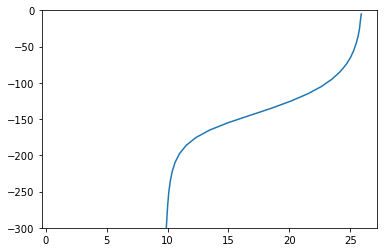

In [34]:
tidx = 105
varname = varprefix+var
v = data.variables[varname][tidx,regionid,:]
z = -depth[tidx,regionid,:]
plt.plot(v.squeeze(), z)
plt.ylim([-300, 0])

(0, 500)

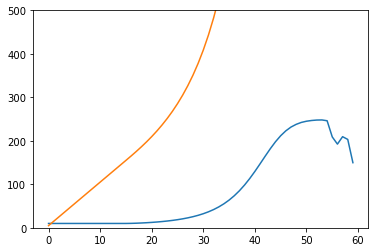

In [19]:
plt.plot(lthickness[0,5,:])
plt.plot(depth[0,5,:])
plt.ylim([0,500])

In [89]:
# region (1: Arctic; 2: Equatorial; 3: Southern Ocean; 4: Nino3; 5: Nino4; 6: Nino3.4; 7: Gloabl)
region = 6
regionid = region - 1

(-300, 0)

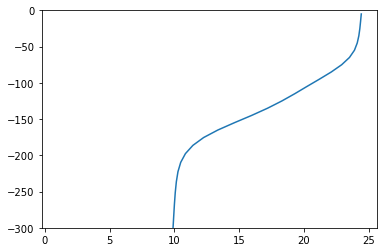

In [105]:
tidx = 0
varname = varprefix+var
v = data.variables[varname][tidx,regionid,:]
z = -depth[tidx,regionid,:]
plt.plot(v.squeeze(), z)
plt.ylim([-300, 0])

In [106]:
# tidxs = 0
# tidxe = 12*5-1
# varname = varprefix+var+'HorAdv'
# v = data.variables[varname][tidxs:tidxe,regionid,:].squeeze()
# z = -depth[tidxs:tidxe,regionid,:]
# t = pdtime0[tidxs:tidxe]
# # print(v)
# # print(z)
# # print(t)
# plt.contourf(v)
# plt.colorbar()
# # plt.ylim([-300, 0])
# plt.xlim([0,30])

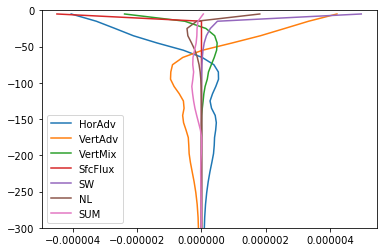

In [107]:
budget = np.zeros([len(varsuffix),z.size])
for i, vs in enumerate(varsuffix):
    varname = varprefix+var+vs
    budget[i,:] = data.variables[varname][tidx,regionid,:].squeeze()
    
for i in np.arange(len(varsuffix)):
    plt.plot(budget[i,:], z, label=varsuffix[i])
tot = np.sum(budget, axis=0)
plt.plot(tot, z, label='SUM')
plt.ylim([-300, 0])
# plt.xlim([-1e-6, 1e-6])
plt.legend() 